In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.linear_model import LinearRegression
#IMPORT STATSMODELS.API AS SM
from sklearn.feature_selection import RFE
#FROM STATSMODELS.STATS.OUTLIERS_INFLUENCE IMPORT VARIANCE_INFLATION_FACTOR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv('CarSellingPrice.csv')

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
df.shape

(301, 9)

In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [19]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
final_dataset['Current_Year']=2022

In [21]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [22]:
final_dataset['no_year']=final_dataset['Current_Year']-final_dataset['Year']

In [23]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [24]:
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [25]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [26]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [27]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,False,True,False,True
1,4.75,9.54,43000,0,9,True,False,False,True
2,7.25,9.85,6900,0,5,False,True,False,True
3,2.85,4.15,5200,0,11,False,True,False,True
4,4.60,6.87,42450,0,8,True,False,False,True


In [28]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [29]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [30]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [31]:
df['Kms_Driven'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

In [32]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [33]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
df['Owner'].unique()

array([0, 1, 3])

In [36]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [37]:
df['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [38]:
df['Present_Price'].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(2)

In [42]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [43]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: ylabel='Selling_Price'>

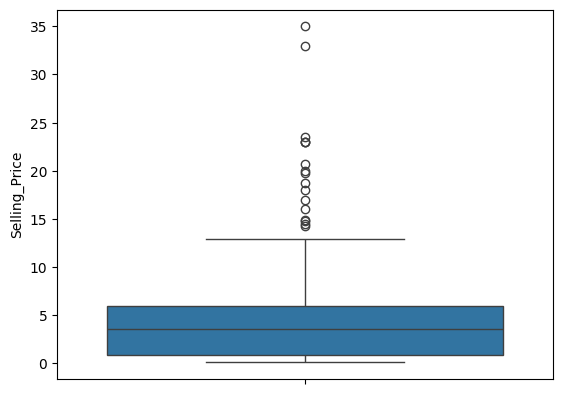

In [45]:
sns.boxplot(data=df['Selling_Price'])

<Axes: ylabel='Present_Price'>

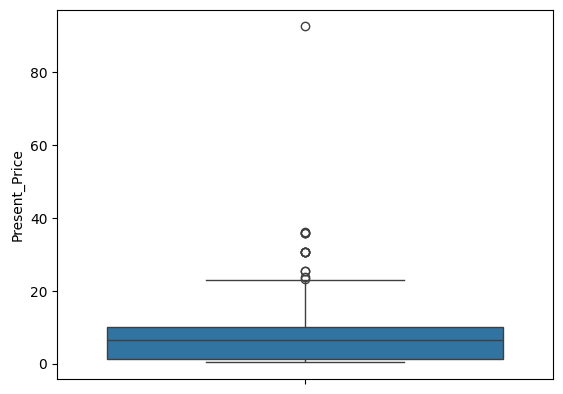

In [46]:
sns.boxplot(data=df['Present_Price'])

In [47]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [48]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [50]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [52]:
label.fit(df.Fuel_Type)
df.Fuel_Type=label.transform(df.Fuel_Type)

In [53]:
label.fit(df.Kms_Driven)
df.Kms_Driven=label.transform(df.Kms_Driven)

In [54]:
label.fit(df.Selling_Price)
df.Selling_Price=label.transform(df.Selling_Price)

In [55]:
label.fit(df.Present_Price)
df.Present_Price=label.transform(df.Present_Price)

In [56]:
label.fit(df.Car_Name)
df.Car_Name=label.transform(df.Car_Name)

In [57]:
label.fit(df.Year)
df.Year=label.transform(df.Year)

In [58]:
label.fit(df.Seller_Type)
df.Seller_Type=label.transform(df.Seller_Type)

In [59]:
label.fit(df.Transmission)
df.Transmission=label.transform(df.Transmission)

In [60]:
label.fit(df.Owner)
df.Owner=label.transform(df.Owner)

In [61]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,59,57,86,2,0,1,0
1,93,10,78,104,135,1,0,1,0
2,68,14,112,106,26,2,0,1,0
3,96,8,52,49,18,2,0,1,0
4,92,11,76,73,134,1,0,1,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car_Name       301 non-null    int64
 1   Year           301 non-null    int64
 2   Selling_Price  301 non-null    int64
 3   Present_Price  301 non-null    int64
 4   Kms_Driven     301 non-null    int64
 5   Fuel_Type      301 non-null    int64
 6   Seller_Type    301 non-null    int64
 7   Transmission   301 non-null    int64
 8   Owner          301 non-null    int64
dtypes: int64(9)
memory usage: 21.3 KB


In [63]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

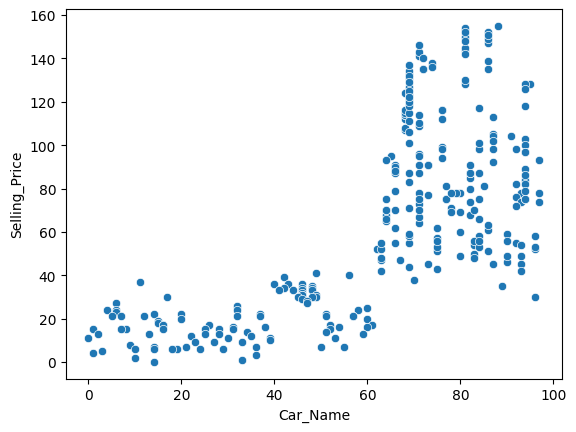

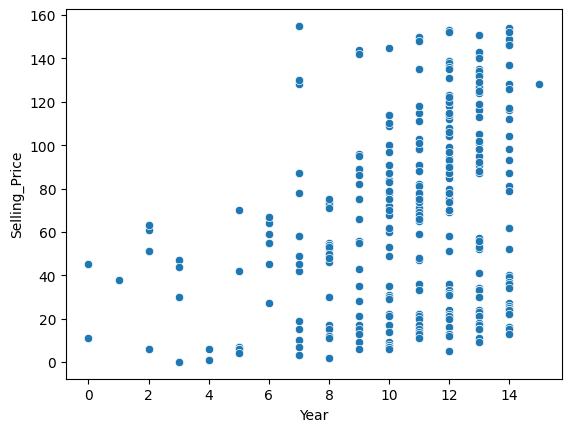

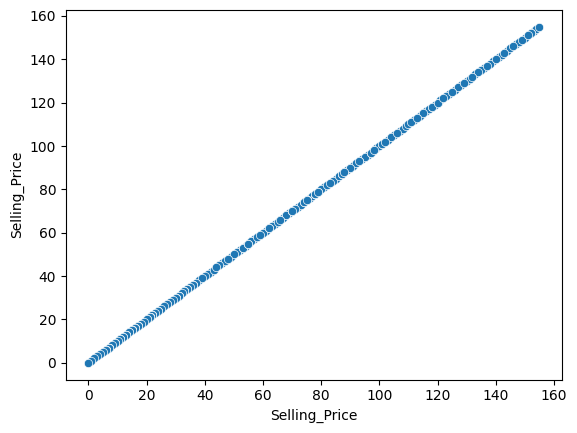

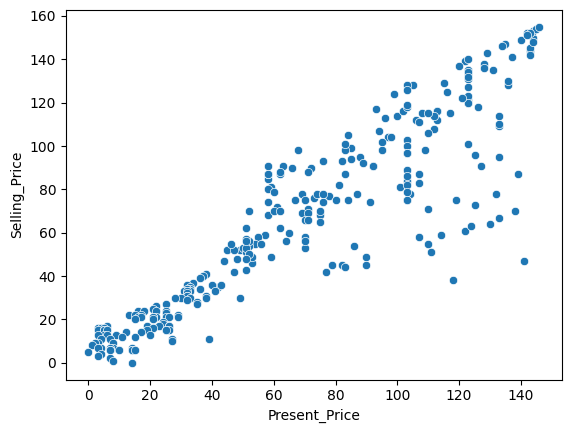

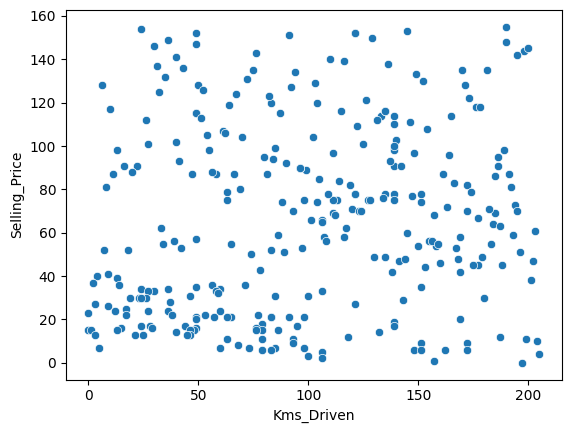

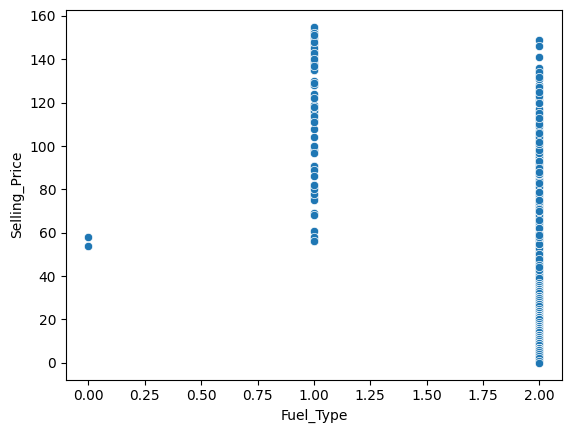

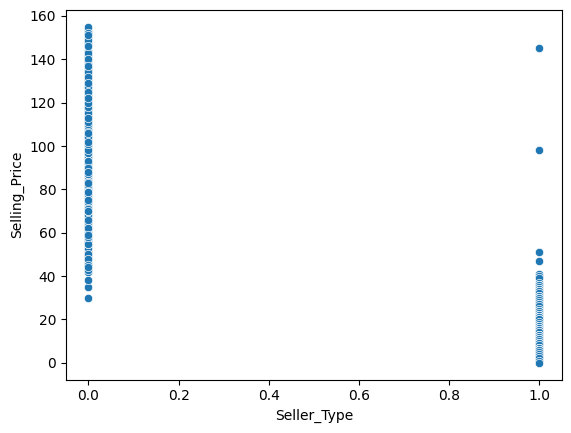

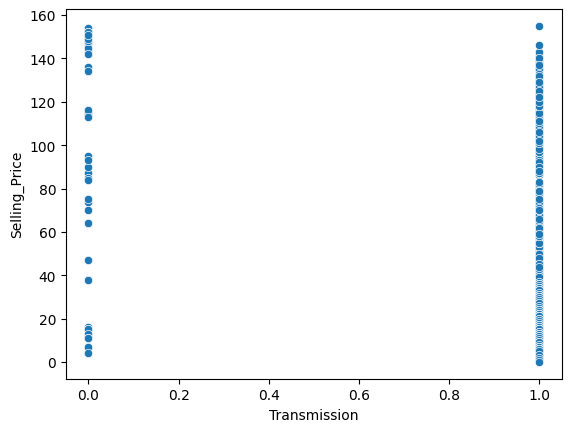

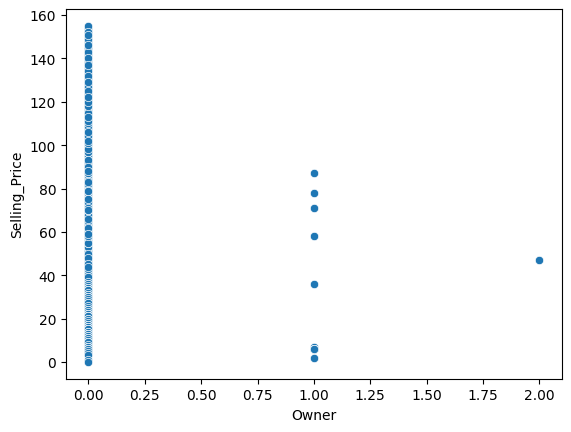

In [67]:
for col in df:
    sns.scatterplot(data=df, x=col, y='Selling_Price')
    plt.show()

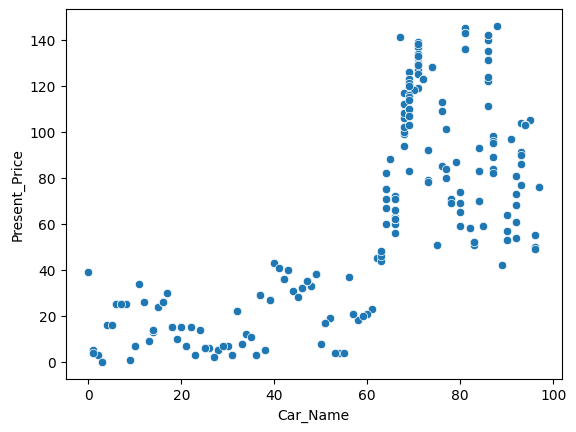

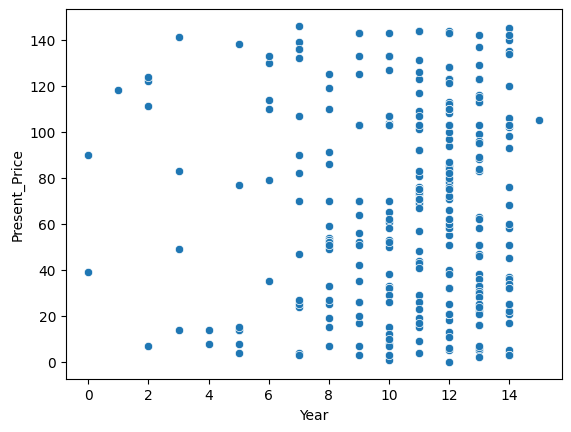

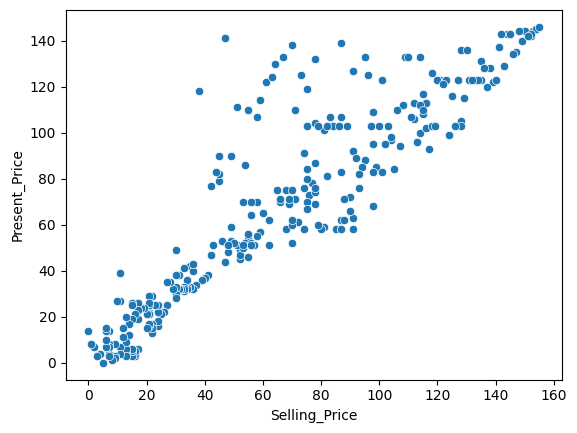

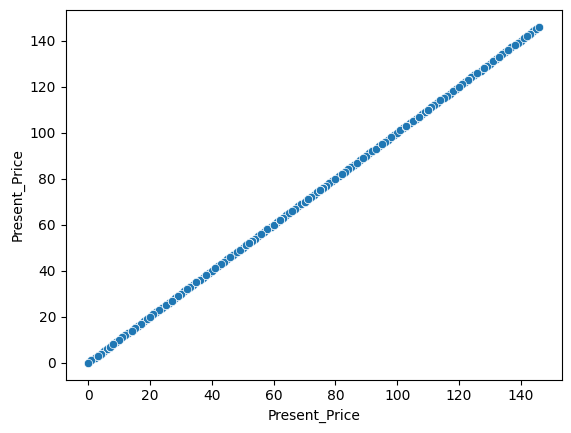

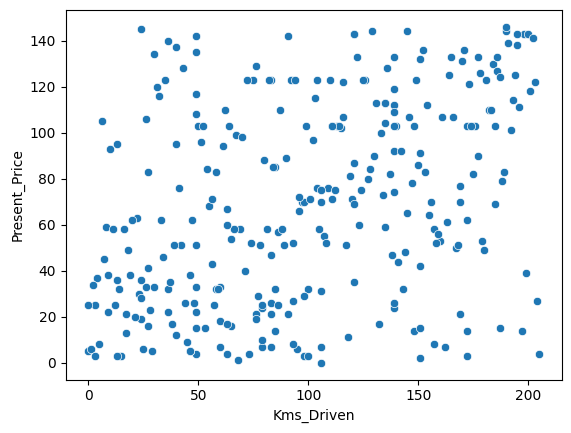

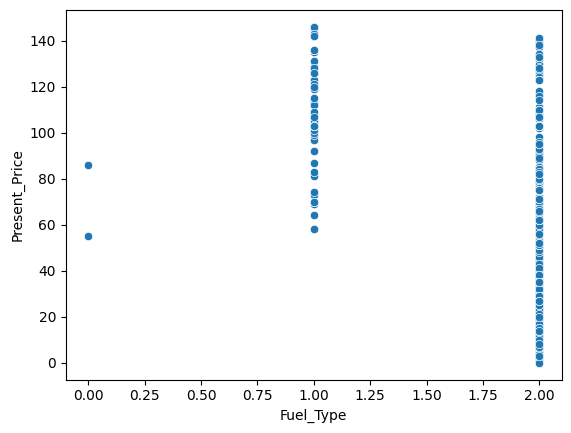

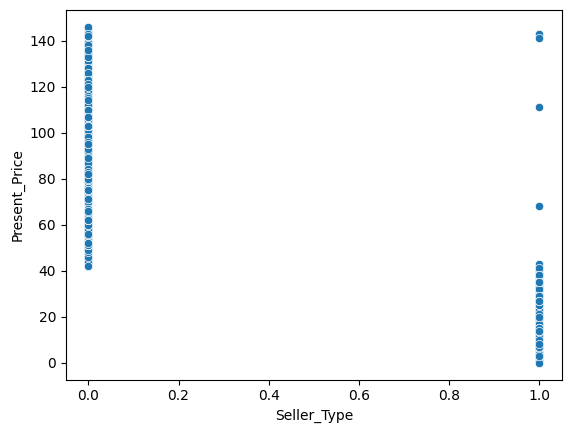

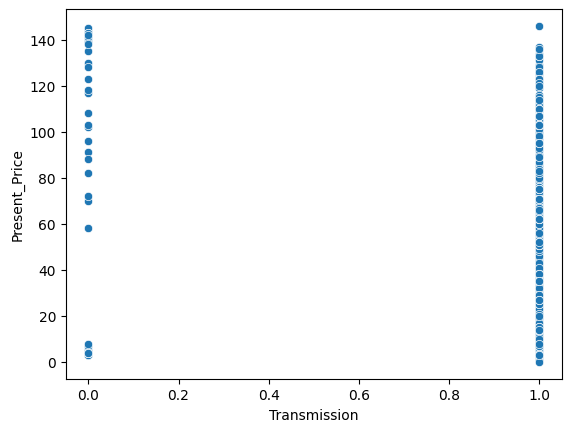

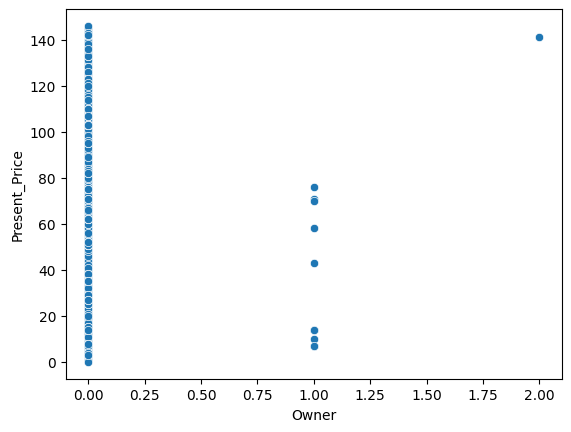

In [68]:
for col in df:
    sns.scatterplot(data=df, x=col, y='Present_Price')
    plt.show()

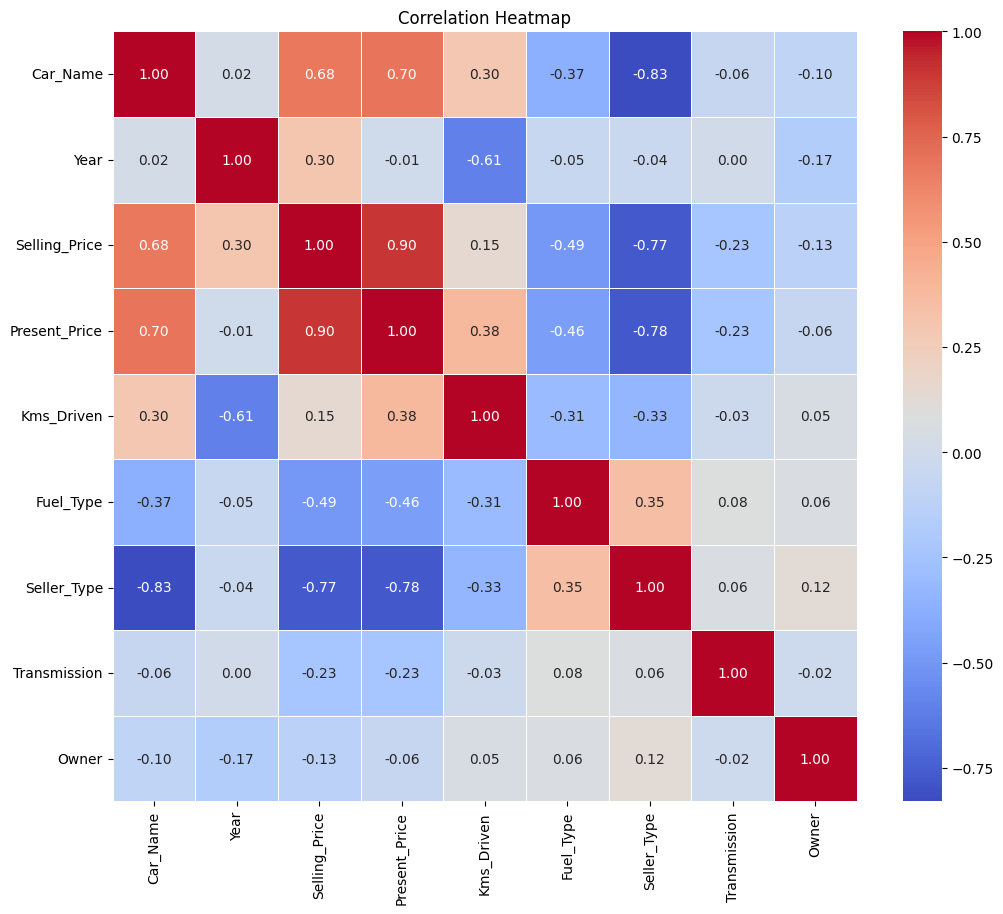

In [69]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [70]:
columns_to_sort=['Fuel_Type','Car_Name','Kms_Driven','Year']

In [71]:
independent_data_for_model=df[columns_to_sort]
independent_data_for_model.head()

,Fuel_Type,Car_Name,Kms_Driven,Year
0,2,90,86,11
1,1,93,135,10
2,2,68,26,14
3,2,96,18,8
4,1,92,134,11


In [78]:
x=df[['Fuel_Type','Car_Name','Kms_Driven','Year']]
y=df.Selling_Price

In [79]:
x

,Fuel_Type,Car_Name,Kms_Driven,Year
0,2,90,86,11
1,1,93,135,10
2,2,68,26,14
3,2,96,18,8
4,1,92,134,11
...,...,...,...,...
296,1,69,103,13
297,2,66,172,12
298,2,69,193,6
299,1,69,31,14


In [80]:
y

0       59
1       78
2      112
3       52
4       76
      ... 
296    129
297     70
298     59
299    137
300     88
Name: Selling_Price, Length: 301, dtype: int64

In [74]:
x=df[['Fuel_Type','Car_Name','Kms_Driven','Year']]
y=df.Present_Price

In [75]:
x

,Fuel_Type,Car_Name,Kms_Driven,Year
0,2,90,86,11
1,1,93,135,10
2,2,68,26,14
3,2,96,18,8
4,1,92,134,11
...,...,...,...,...
296,1,69,103,13
297,2,66,172,12
298,2,69,193,6
299,1,69,31,14


In [77]:
y

0       57
1      104
2      106
3       49
4       73
      ... 
296    115
297     62
298    114
299    120
300     62
Name: Present_Price, Length: 301, dtype: int64

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
linre=LinearRegression()
linre

LinearRegression()

In [83]:
linre.fit(x,y)

LinearRegression()

In [84]:
value=[[2,88.6,168.8,64.1]]
predicted=linre.predict(value)
print(predicted)

[382.12793816]


In [85]:
linre.score(x,y)

0.618672176607898

In [86]:
x.head(1)

,Fuel_Type,Car_Name,Kms_Driven,Year
0,2,90,86,11


In [87]:
y.head(1)

0    59
Name: Selling_Price, dtype: int64